In [57]:
from math import radians, cos, sin, asin, sqrt, atan2
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
from descartes import PolygonPatch
import shapefile
from matplotlib.lines import Line2D
import warnings
import matplotlib.colors as colors
from shapely.geometry import Point
from matplotlib import pyplot
import numpy as np
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 999
pd.set_option('display.max_columns', None)

In [2]:
roads_path = "C:\\Users\\lilyx\\DataViz\\Data\\Capital_Metro_Shapefiles_-_JANUARY_2020\\Routes.shp"
roads = gpd.read_file(roads_path, encoding='utf-8')
roads.head(1)

ROUTE_ID                   ROUTENAME   DIRECTION ROUTECOLOR TEXTCOLOR  \
0         1  North Lamar/South Congress  Southbound     004A97    FFFFFF   

  ROUTETYPE ROUTETHEME SERVICENM SERVICETYP  SIGN_ID SERVICE_ID  \
0     Local       None   Weekday    Weekday      133      1-133   

          SOURCE  SOURCEDATE  \
0  Capital Metro  2020-01-31   

                                            geometry  
0  LINESTRING (627856.218 3365895.180, 627889.706...

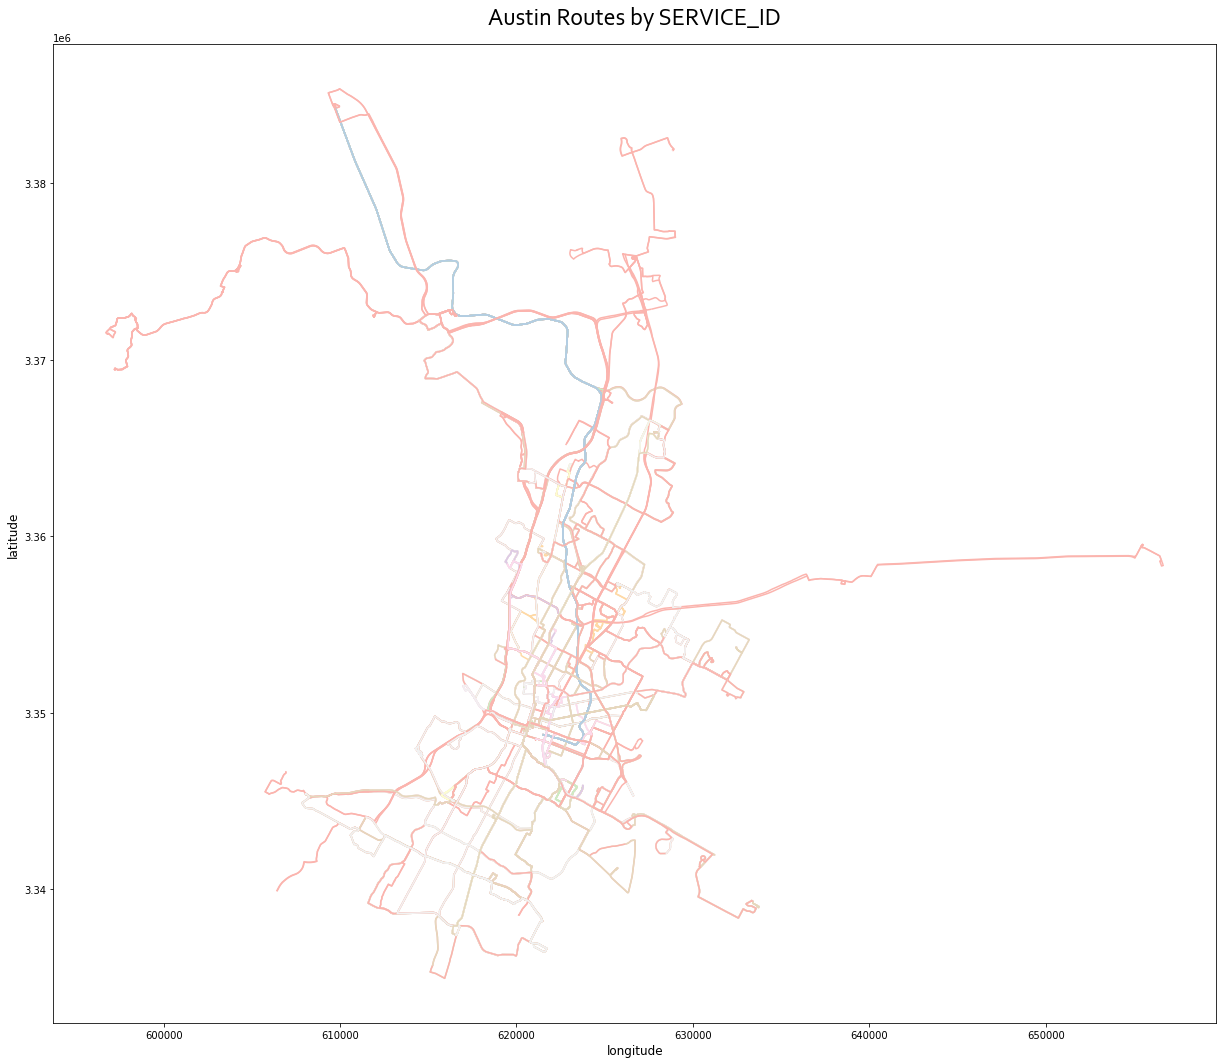

In [11]:
variable = 'SERVICE_ID'
roads.plot(column= variable,figsize=(24, 18), cmap = 'Pastel1', legend=False)
plt.title(f"Austin Routes by {variable}", fontdict={"family":"Corbel"}, pad=20, fontname="Corbel", size=24);
plt.ylabel("latitude", fontsize=12);
plt.xlabel("longitude", fontsize=12);

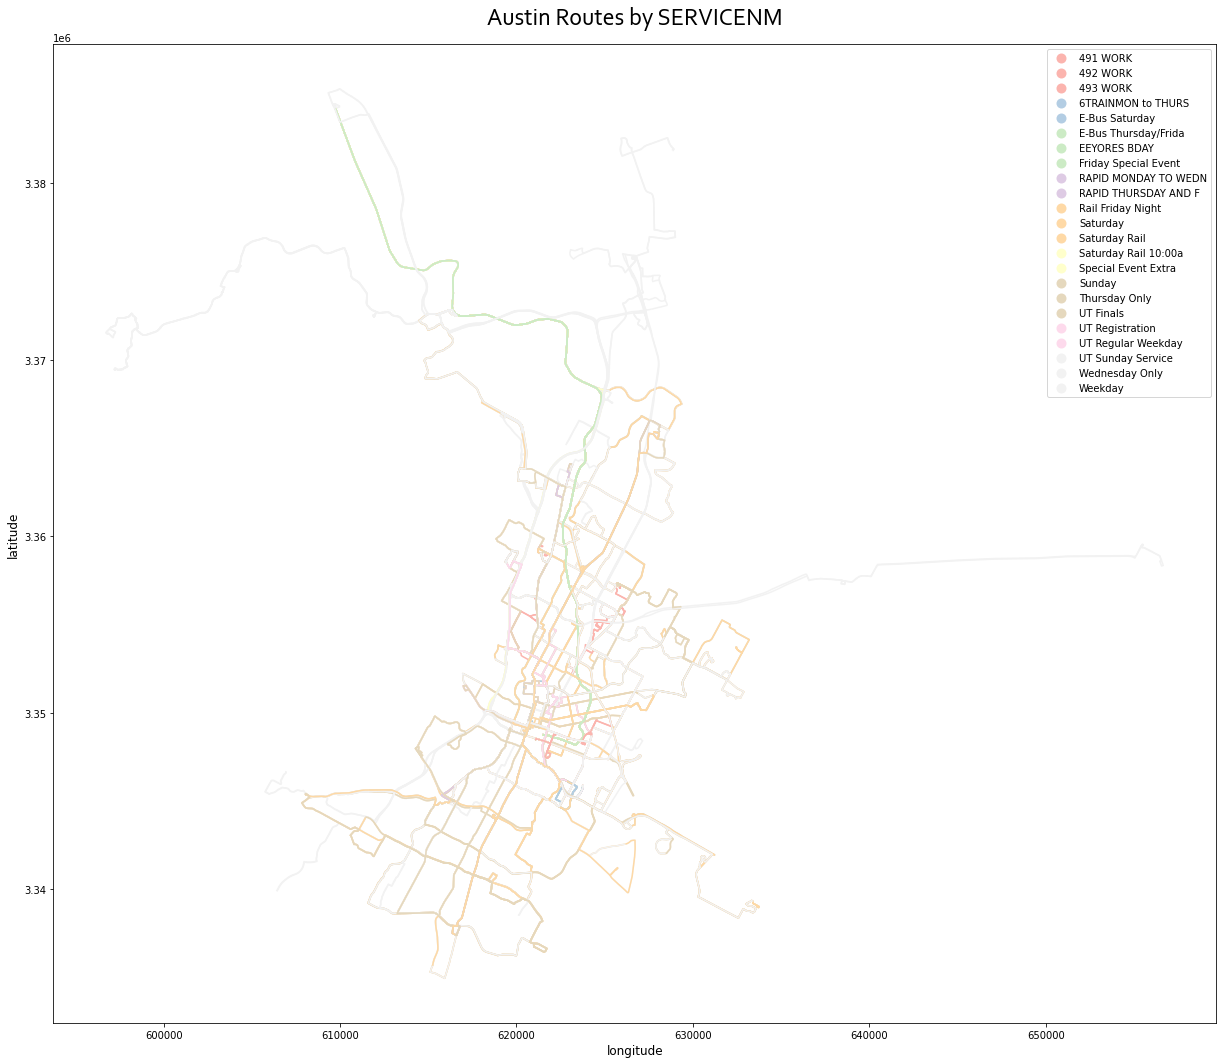

In [12]:
variable = 'SERVICENM'
roads.plot(column= variable,figsize=(24, 18), cmap = 'Pastel1', legend=True)
plt.title(f"Austin Routes by {variable}", fontdict={"family":"Corbel"}, pad=20, fontname="Corbel", size=24);
plt.ylabel("latitude", fontsize=12);
plt.xlabel("longitude", fontsize=12);

In [75]:
shp_path = "C:\\Users\\lilyx\\DataViz\\Data\\Capital_Metro_Shapefiles_-_JANUARY_2020\\ADA_Polygons.shp"
shpNTA = gpd.read_file(shp_path)
shpNTA.head()

NAME    SQ_MILES     SERVICENM         SOURCE  SOURCEDATE  \
0  None  135.402436  JANUARY 2020  Capital Metro  2020-01-31   
1  None  135.402461  JANUARY 2020  Capital Metro  2020-01-31   
2  None   42.689410  JANUARY 2020  Capital Metro  2020-01-31   
3  None  140.793071  JANUARY 2020  Capital Metro  2020-01-31   
4  None  135.402436  JANUARY 2020  Capital Metro  2020-01-31   

                                            geometry  
0  POLYGON ((617037.308 3373850.418, 617116.731 3...  
1  POLYGON ((617037.308 3373850.418, 617116.731 3...  
2  POLYGON ((625603.674 3360699.854, 625687.698 3...  
3  POLYGON ((617037.308 3373850.418, 617116.731 3...  
4  POLYGON ((617037.308 3373850.418, 617116.731 3...

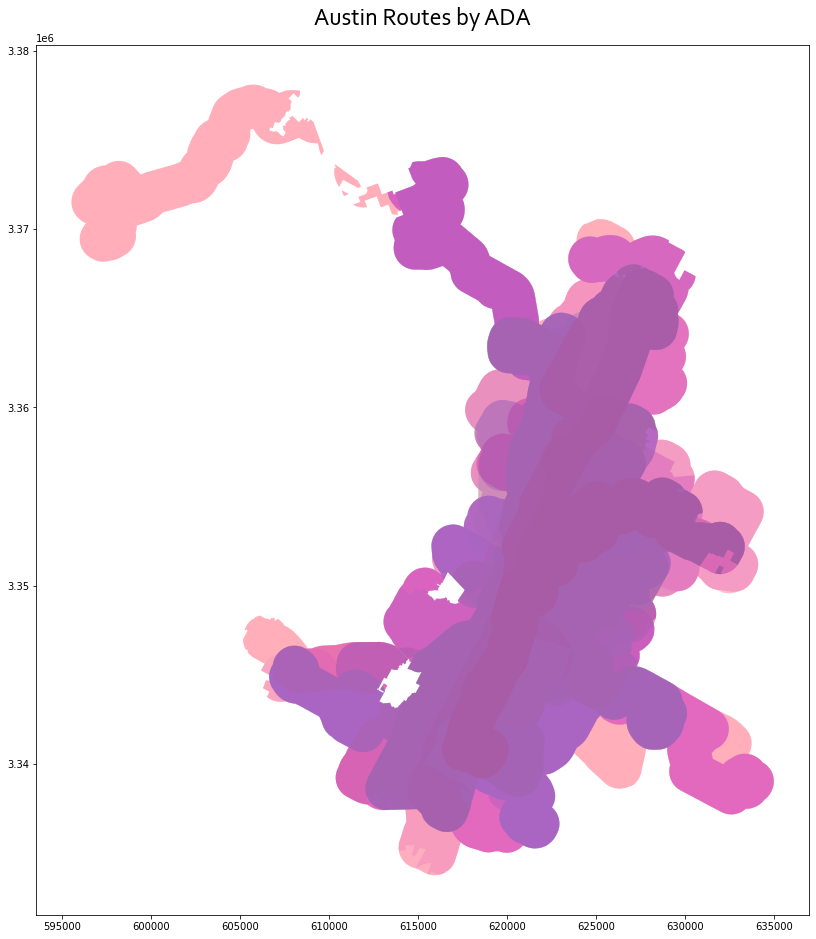

In [102]:
ADA_Polygons=gpd.read_file("C:\\Users\\lilyx\\DataViz\\Data\\Capital_Metro_Shapefiles_-_JANUARY_2020\\ADA_Polygons.shp")
ADA_Polygons.plot(figsize=(18, 16),edgecolor='#ffffff', cmap='hsv', column='SQ_MILES',linewidth=0.2,label= "x",legend=False, alpha=0.05)
plt.title(f"Austin Routes by ADA", fontdict={"family":"Corbel"}, pad=20, fontname="Corbel", size=24);

In [49]:
shp_path = "C:\\Users\\lilyx\\DataViz\\Data\\Capital_Metro_Shapefiles_-_JANUARY_2020\\Service_Area.shp"
shpNTA = gpd.read_file(shp_path)
shpNTA.head(2)

NAME     SQ_MILES     SERVICENM         SOURCE  SOURCEDATE  \
0   Jonestown  19622175.77  JANUARY 2020  Capital Metro  2020-01-31   
1  Lago Vista  40310975.95  JANUARY 2020  Capital Metro  2020-01-31   

                                            geometry  
0  POLYGON ((599865.467 3370541.684, 599880.003 3...  
1  MULTIPOLYGON (((597186.875 3365808.666, 597167...

In [50]:
shp_path = "C:\\Users\\lilyx\\DataViz\\Data\\Capital_Metro_Shapefiles_-_JANUARY_2020\\Transit_Hubs.shp"
shpNTA = gpd.read_file(shp_path)
shpNTA.head(2)

NAME   ON_STREET        AT_STREET     ADDRESS     CITY  \
0   Pavilion Park & Ride  US HWY 183   Pavilion Blvd.  12400 US H   Austin   
1  Jonestown Park & Ride  Park Drive  Crestview Drive        None  Leander   

  STATE      ZIP       SERVICE         SOURCE  SOURCEDATE  \
0    TX  78759.0  JANUARY 2020  Capital Metro  2020-01-31   
1    TX  78645.0  JANUARY 2020  Capital Metro  2020-01-31   

                         geometry  
0  POINT (619301.672 3366796.351)  
1  POINT (603369.816 3373894.389)

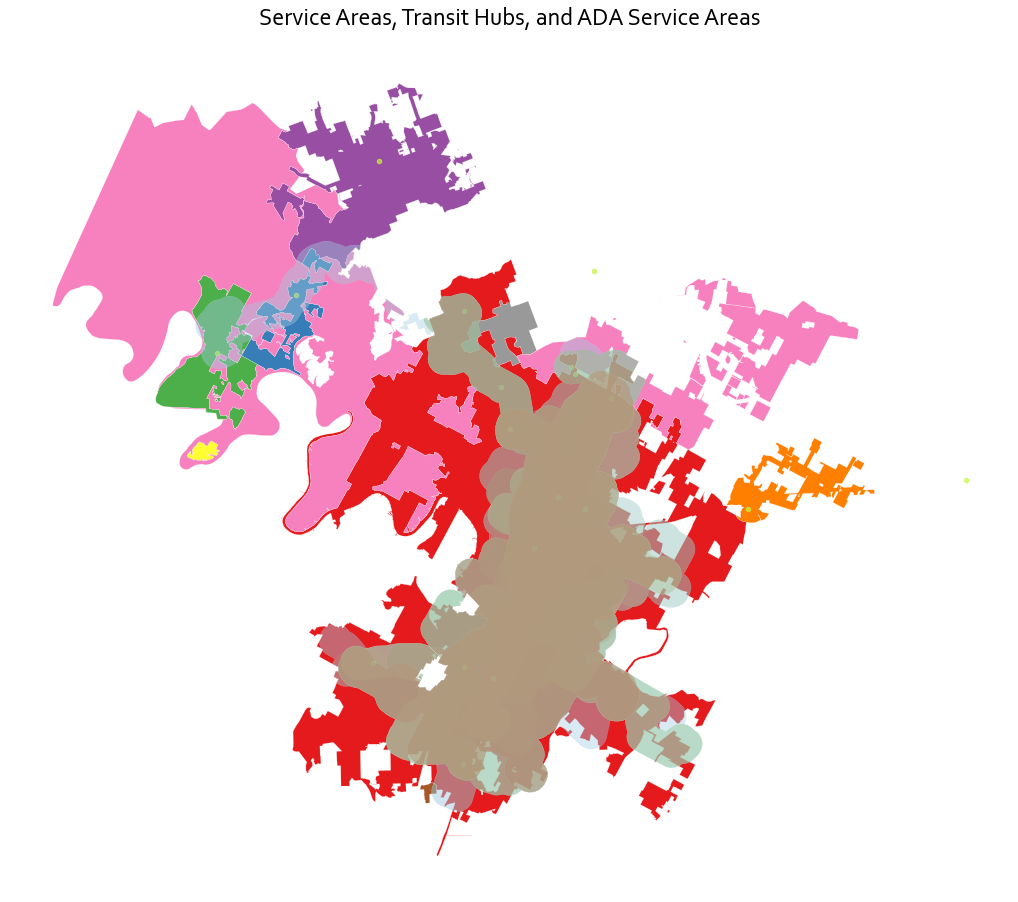

In [105]:
Service_Area = gpd.read_file('C:\\Users\\lilyx\\DataViz\\Data\\Capital_Metro_Shapefiles_-_JANUARY_2020\\Service_Area.shp')
Transit_Hubs = gpd.read_file("C:\\Users\\lilyx\\DataViz\\Data\\Capital_Metro_Shapefiles_-_JANUARY_2020\\Transit_Hubs.shp")
ADA_Polygons=gpd.read_file("C:\\Users\\lilyx\\DataViz\\Data\\Capital_Metro_Shapefiles_-_JANUARY_2020\\ADA_Polygons.shp")


fig, ax = pyplot.subplots(figsize=(18, 24))
ax.axis('off')
Service_Area.plot(ax=ax, cmap='Set1', column='NAME', edgecolor='#FFFFFF', linewidth=0.2)
Transit_Hubs.plot(ax=ax, markersize = 20, color='#c5f542', alpha = 0.7)
ADA_Polygons.plot(ax=ax, edgecolor='#ffffff', cmap='Paired_r', column='SQ_MILES',linewidth=0.2,label= "x",legend=False, alpha = 0.08)
ax.set_title("Service Areas, Transit Hubs, and ADA Service Areas", fontdict={"family":"Corbel"}, pad=20, size=24)
plt.savefig('Service_Area_Transit_Hubs.png',transparent=True);

In [93]:
shp_path = "C:\\Users\\lilyx\\DataViz\\Data\\Capital_Metro_Shapefiles_-_JANUARY_2020\\Stops.shp"
shpNTA = gpd.read_file(shp_path)
shpNTA.head(2)

STOP_ID  BENCHES  SHELTERS  BIKERACKS  TRASHCANS              STOP_NAME  \
0      243        1         0          0          1        RIO GRANDE/15TH   
1      466        1         2          0          1  8740 LAMAR/PAYTON GIN   

  STOP_ABBR STREET_NMB ON_STREET   AT_STREET    CITY    ZIP   BAY STOP_TYPE  \
0      RG15     000606      15Th  Rio Grande  Austin  78701  None  Bus Stop   
1     S1801     008740     Lamar  Payton Gin  Austin  78758  None  Bus Stop   

   PLACEMENT     CORNER STATUS   LATITUDE  LONGITUDE         SOURCE  \
0    Farside  Northwest   None  30.278966 -97.746339  Capital Metro   
1  Mid-Block  Southwest   None  30.356809 -97.701066  Capital Metro   

   SOURCEDATE                        geometry  
0  2020-01-31  POINT (620577.879 3350362.856)  
1  2020-01-31  POINT (624833.900 3359038.985)

In [94]:
shpNTA.shape

(2405, 22)

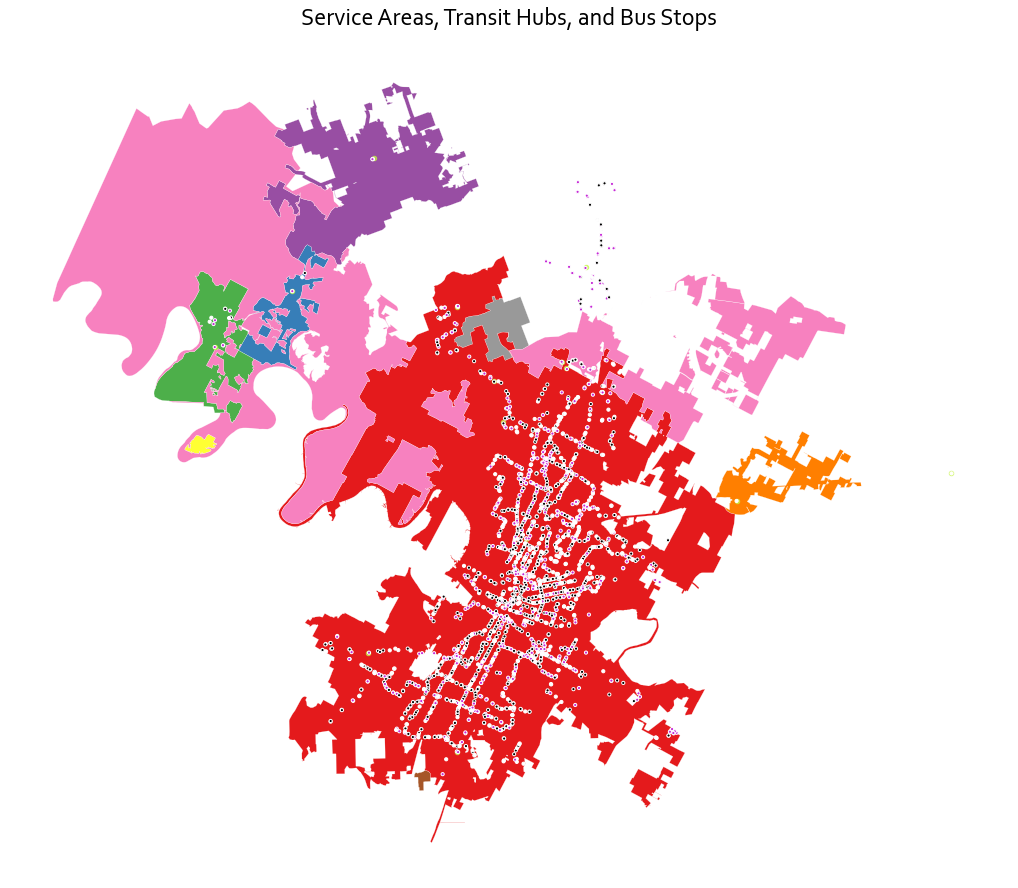

In [106]:
Service_Area = gpd.read_file('C:\\Users\\lilyx\\DataViz\\Data\\Capital_Metro_Shapefiles_-_JANUARY_2020\\Service_Area.shp')
Transit_Hubs = gpd.read_file("C:\\Users\\lilyx\\DataViz\\Data\\Capital_Metro_Shapefiles_-_JANUARY_2020\\Transit_Hubs.shp")
Stops = gpd.read_file("C:\\Users\\lilyx\\DataViz\\Data\\Capital_Metro_Shapefiles_-_JANUARY_2020\\Stops.shp")


fig, ax = pyplot.subplots(figsize=(18, 24))
ax.axis('off')
Service_Area.plot(ax=ax, cmap='Set1', column='NAME', edgecolor='#FFFFFF', linewidth=0.2)
Transit_Hubs.plot(ax=ax, markersize = 20, color='#c5f542', alpha = 0.7)
Stops.plot(ax=ax, edgecolor='#ffffff', cmap='gnuplot2_r', column='PLACEMENT',s=10,label= "x",legend=False, alpha = 1)
ax.set_title("Service Areas, Transit Hubs, and Bus Stops", fontdict={"family":"Corbel"}, pad=20, size=24)
plt.savefig('Service_Area_Transit_Hubs_and_Bus_Stops.png',transparent=True);

In [108]:
shp_path = "C:\\Users\\lilyx\\DataViz\\Data\\Capital_Metro_Shapefiles_-_JANUARY_2020\\Service_Area.shp"
shpNTA = gpd.read_file(shp_path)
shpNTA.head()

NAME     SQ_MILES     SERVICENM         SOURCE  SOURCEDATE  \
0      Jonestown  19622175.77  JANUARY 2020  Capital Metro  2020-01-31   
1     Lago Vista  40310975.95  JANUARY 2020  Capital Metro  2020-01-31   
2          Manor  25238800.55  JANUARY 2020  Capital Metro  2020-01-31   
3  Point Venture   2444357.44  JANUARY 2020  Capital Metro  2020-01-31   
4     San Leanna   1123896.52  JANUARY 2020  Capital Metro  2020-01-31   

                                            geometry  
0  POLYGON ((599865.467 3370541.684, 599880.003 3...  
1  MULTIPOLYGON (((597186.875 3365808.666, 597167...  
2  MULTIPOLYGON (((644148.273 3362119.628, 643854...  
3  POLYGON ((597255.276 3362178.836, 597183.453 3...  
4  POLYGON ((614231.661 3335831.375, 614249.901 3...

In [116]:
shp_path = "C:\\Users\\lilyx\\DataViz\\Data\\Capital_Metro_Shapefiles_-_JANUARY_2020\\Service_Area.shp"
shpNTA = gpd.read_file(shp_path)
# shp_shape = shp.to_crs({'init': 'epsg:4326'})
# shp_shape.boundary.plot()
shpNTA.head(2)

NAME     SQ_MILES     SERVICENM         SOURCE  SOURCEDATE  \
0   Jonestown  19622175.77  JANUARY 2020  Capital Metro  2020-01-31   
1  Lago Vista  40310975.95  JANUARY 2020  Capital Metro  2020-01-31   

                                            geometry  
0  POLYGON ((599865.467 3370541.684, 599880.003 3...  
1  MULTIPOLYGON (((597186.875 3365808.666, 597167...

In [117]:
shpNTA['NAME'].unique()

array(['Jonestown', 'Lago Vista', 'Manor', 'Point Venture', 'San Leanna',
       'Williamson County', 'Austin', 'Leander', 'Travis County'],
      dtype=object)

In [118]:
Austin = shpNTA[shpNTA['NAME'] == 'Austin']
Austin.shape, shpNTA.shape

((1, 6), (9, 6))

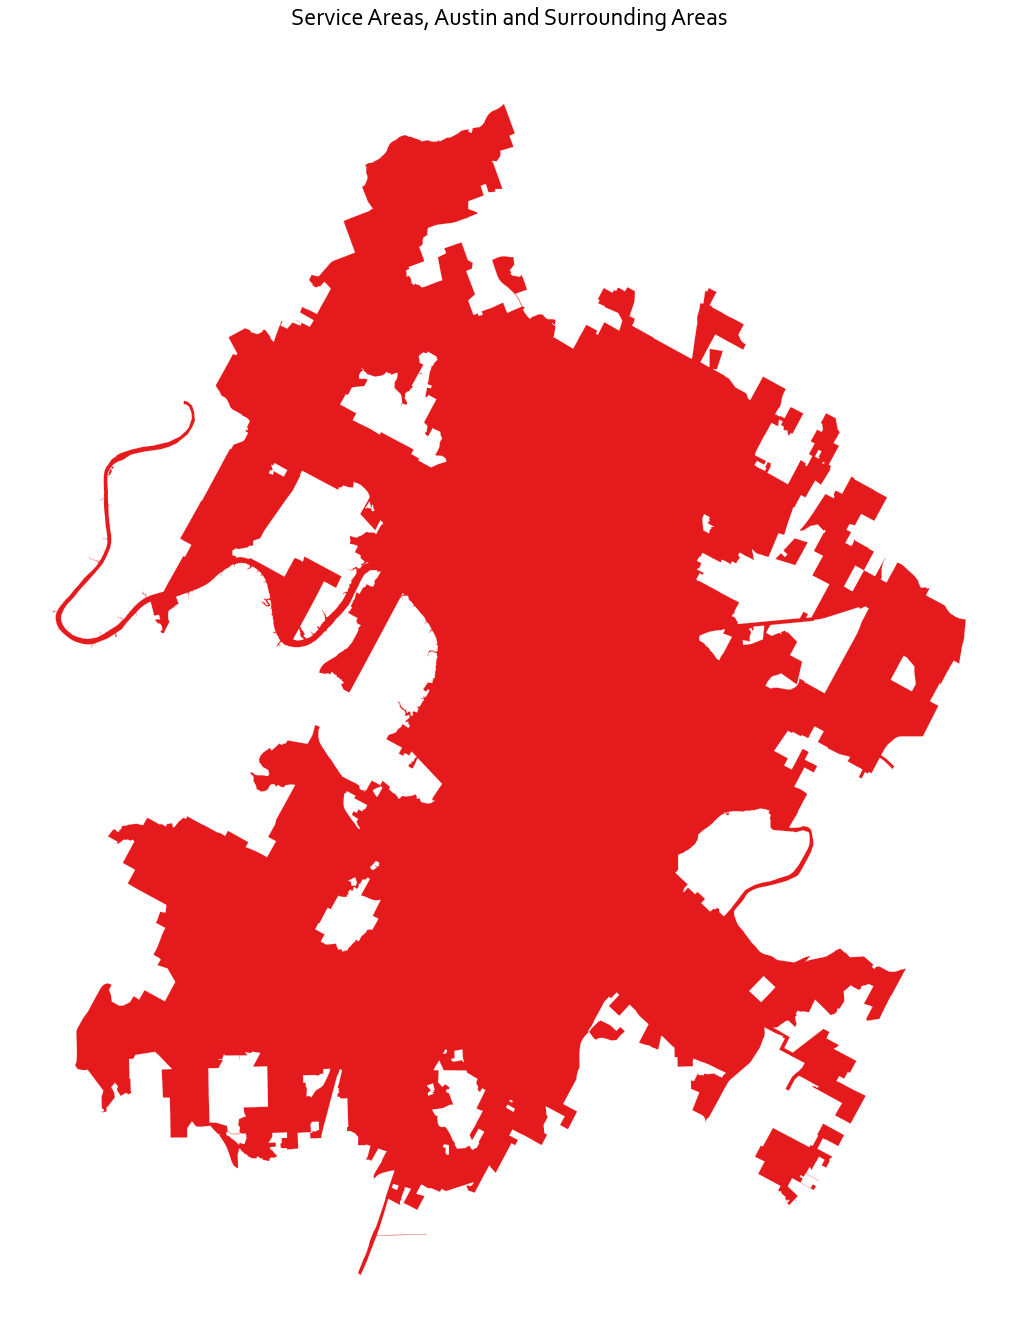

In [120]:
fig, ax = pyplot.subplots(figsize=(18, 24))
ax.axis('off')
Austin.plot(ax=ax, cmap='Set1', column='NAME', edgecolor='#FFFFFF', linewidth=0.2)
ax.set_title("Service Areas, Austin and Surrounding Areas", fontdict={"family":"Corbel"}, pad=20, size=24)
plt.savefig('Service_Area_Austin_Only.png',transparent=True);

No handles with labels found to put in legend.


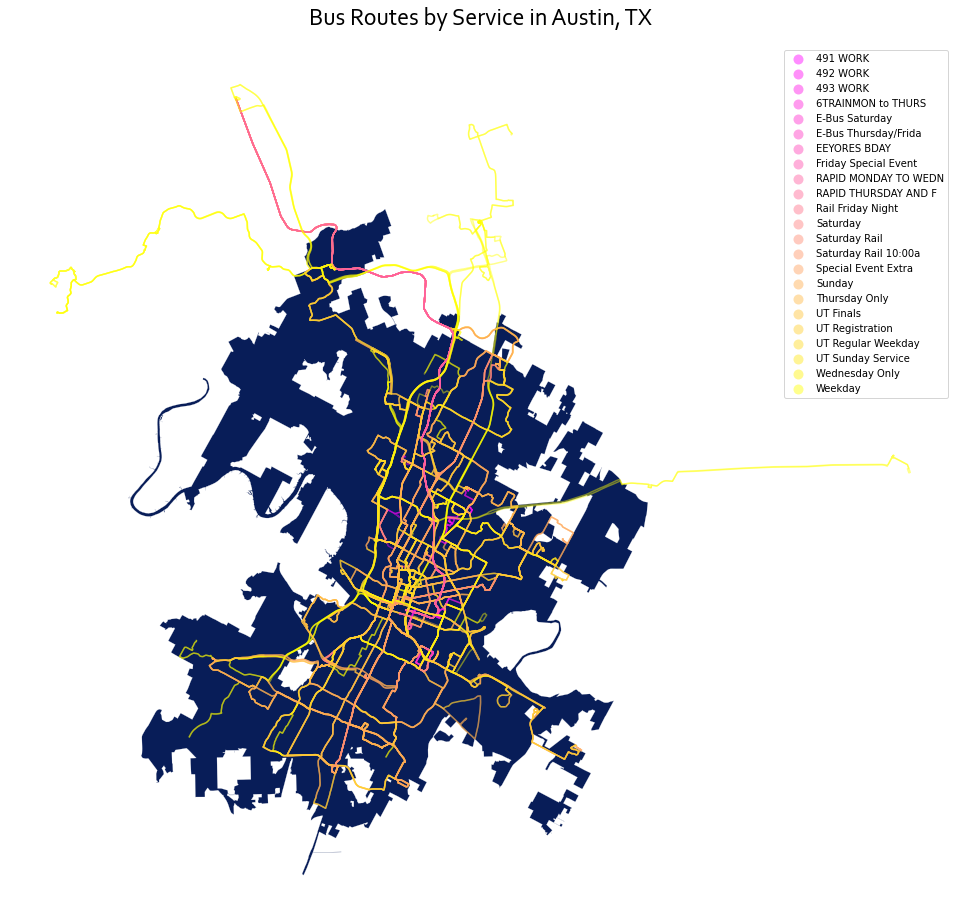

In [134]:
fig, ax = plt.subplots(figsize = (18,16)) 
ax.axis('off')
ax.legend(frameon=False)
Austin.plot(ax=ax, cmap='YlGnBu_r', column='NAME', edgecolor='#FFFFFF', linewidth=0.2)
roads.plot(ax=ax, column=variable, cmap='spring', legend=True, alpha=0.45)
ax.set_title("Bus Routes by Service in Austin, TX", fontdict={"family":"Corbel"}, pad=20, size=24)
plt.savefig('Austin_Plus_Bus_Routes_by_Service.png',transparent=True);

No handles with labels found to put in legend.


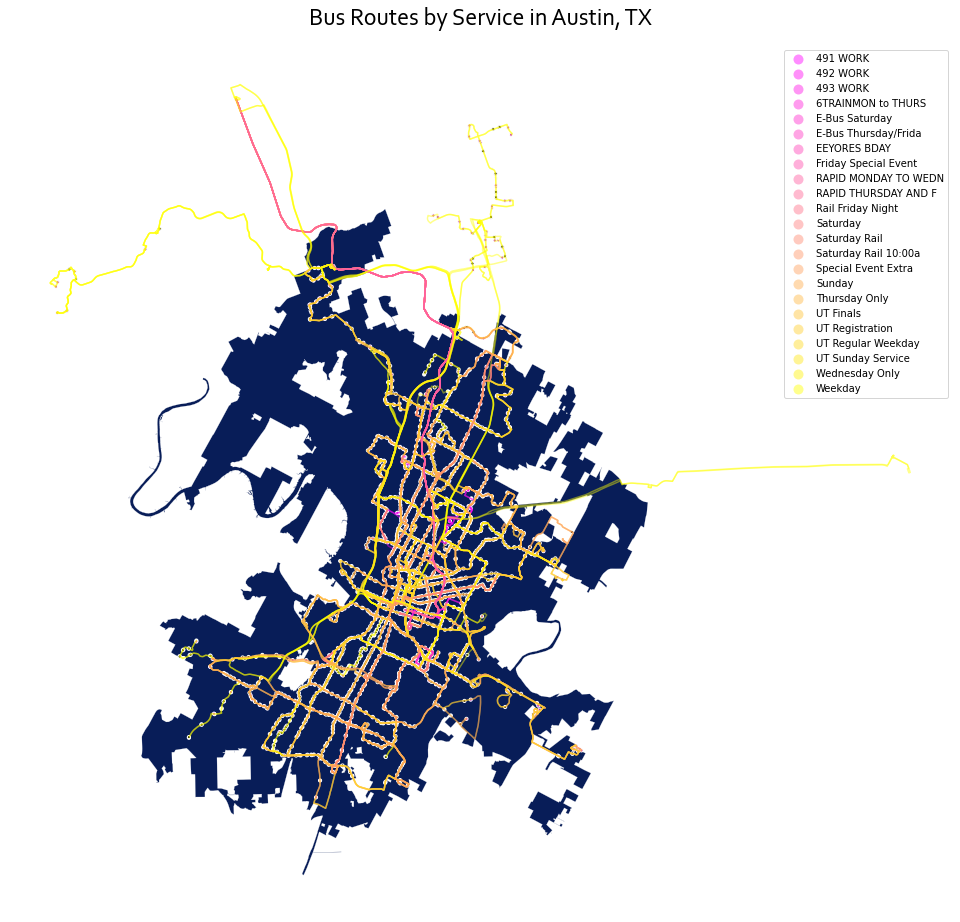

In [137]:
Stops = gpd.read_file("C:\\Users\\lilyx\\DataViz\\Data\\Capital_Metro_Shapefiles_-_JANUARY_2020\\Stops.shp")

fig, ax = plt.subplots(figsize = (18,16)) 
ax.axis('off')
ax.legend(frameon=False)
Austin.plot(ax=ax, cmap='YlGnBu_r', column='NAME', edgecolor='#FFFFFF', linewidth=0.2)
roads.plot(ax=ax, column=variable, cmap='spring', legend=True, alpha=0.45)
Stops.plot(ax=ax, edgecolor='#ffffff', cmap='gnuplot2_r', column='PLACEMENT',s=10,label= "x",legend=False, alpha = 1)
ax.set_title("Bus Routes by Service in Austin, TX", fontdict={"family":"Corbel"}, pad=20, size=24)
plt.savefig('Austin_Plus_Bus_Routes_by_Service.png',transparent=True);

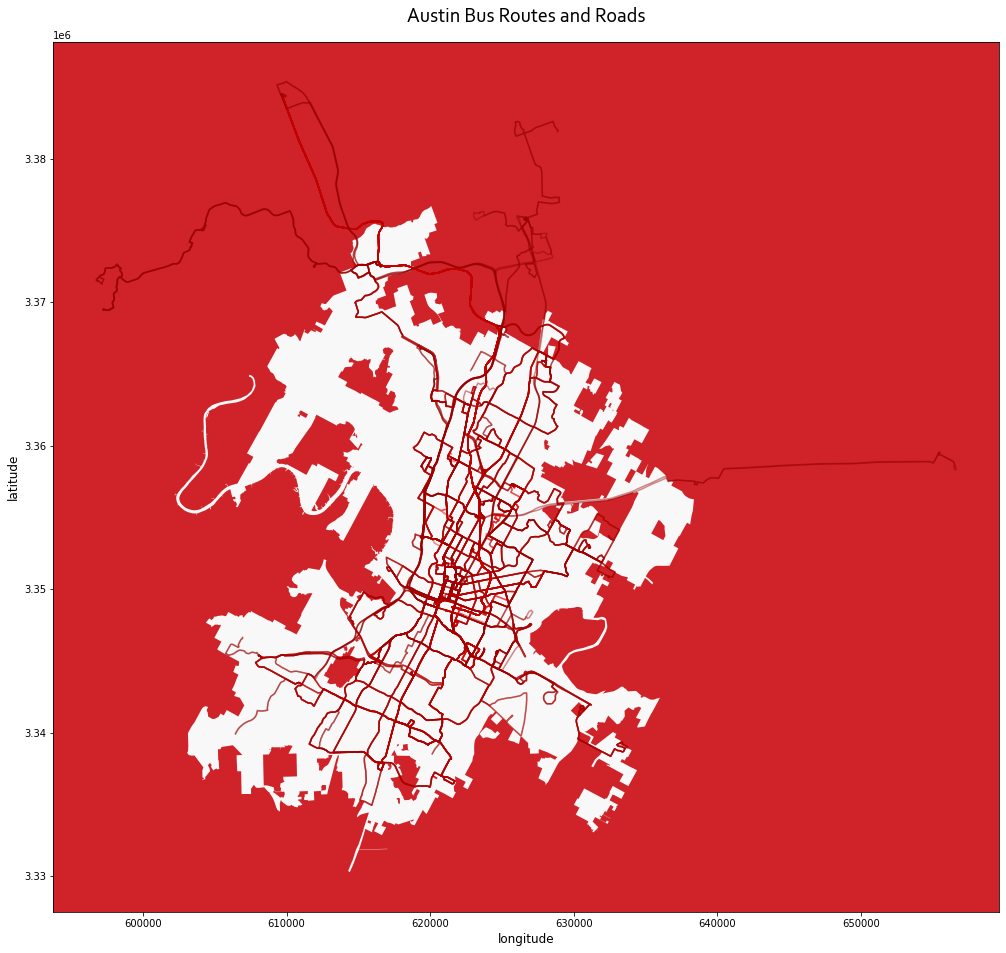

In [140]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
cmap = plt.get_cmap('seismic')
red_cmap = truncate_colormap(cmap, 0.8, 0.95)

cmapb = plt.get_cmap('gist_yarg')
grays = truncate_colormap(cmapb, 0.03, 0.09)
# plt.style.use('dark_background')
fig, ax = plt.subplots(figsize = (18,16)) 
ax.set_facecolor("#cf2329")
Austin.plot(ax=ax, cmap=grays, column='NAME', legend=False, alpha=1,legend_kwds={"frameon": False, "loc":"upper left", "title_fontsize":20, "mode":None,"labelspacing":2,"borderpad":2, "prop":{"family":"Corbel", "size":14}});
roads.plot(ax=ax, column=variable, cmap=red_cmap, legend=False, alpha=0.45)
plt.title("Austin Bus Routes and Roads", fontdict={"family":"Corbel"}, pad=20, fontname="Corbel", size=20);
plt.ylabel("latitude", fontsize=12);
plt.xlabel("longitude", fontsize=12);

plt.savefig('Routes_and_Bus_Services_Austin_TX.png', dpi=500)
# fig.savefig('Truck_Routes_NYC.svg', format='svg', dpi=300)
# plt.savefig('Truck_Routes_NYC.eps', format='eps')
plt.show()

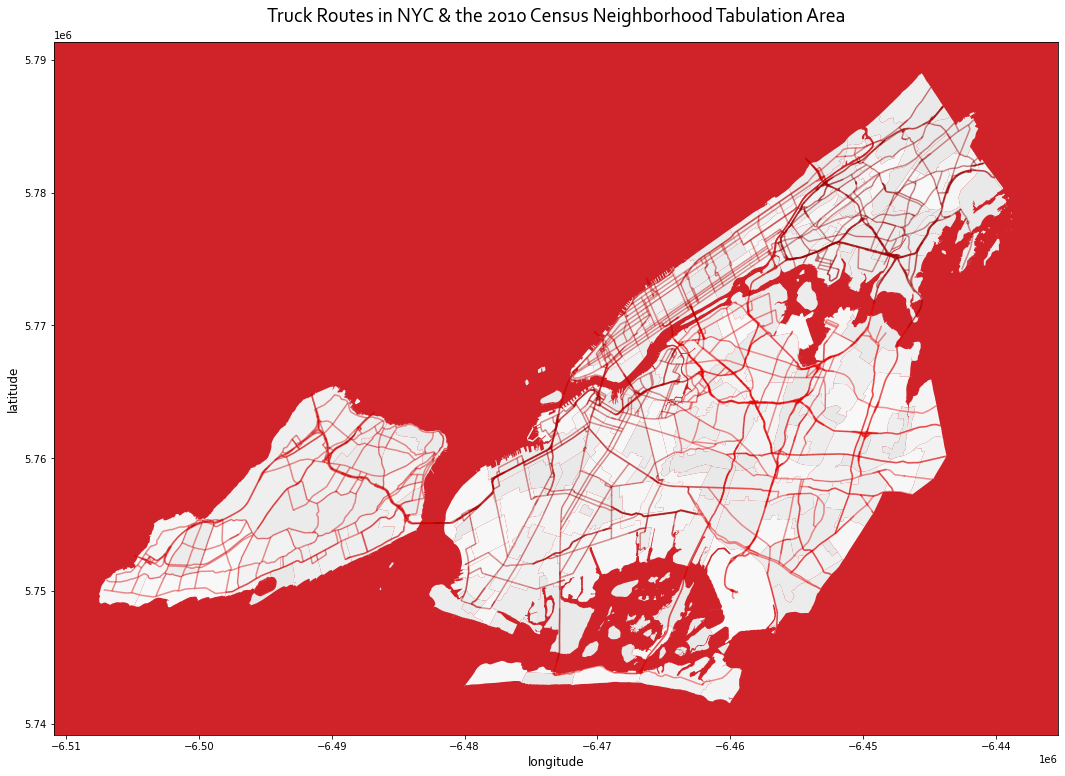

In [29]:
from cartopy import crs as ccrs

fig, ax = plt.subplots(figsize = (18,16)) 
ax.set_facecolor("#cf2329")

# Define the CartoPy CRS object.
crs = ccrs.AzimuthalEquidistant()

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
df_ae = shpNTA.to_crs(crs_proj4)
ddr = roads.to_crs(crs_proj4)

df_ae.plot(ax=ax, cmap=grays, column='ntaname', legend=False, alpha=1,legend_kwds={"frameon": False, "loc":"upper left", "title_fontsize":20, "mode":None,"labelspacing":2,"borderpad":2, "prop":{"family":"Corbel", "size":14}});
ddr.plot(ax=ax, column=variable, cmap=red_cmap, legend=False, alpha=0.45)
plt.title("Truck Routes in NYC & the 2010 Census Neighborhood Tabulation Area", fontdict={"family":"Corbel"}, pad=20, fontname="Corbel", size=20);
plt.ylabel("latitude", fontsize=12);
plt.xlabel("longitude", fontsize=12);

plt.savefig('Truck_Routes_NYC_project4.png', dpi=500)
plt.show()

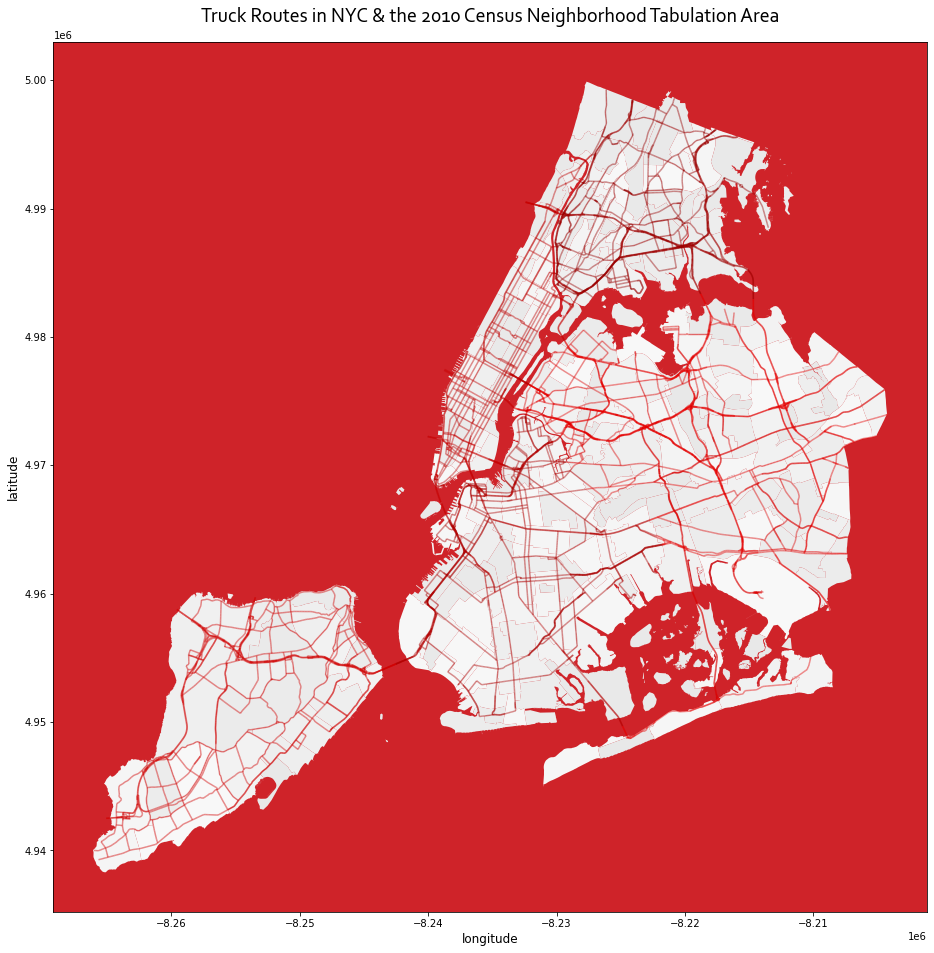

In [30]:
fig, ax = plt.subplots(figsize = (18,16)) 
ax.set_facecolor("#cf2329")

# Define the CartoPy CRS object.
crs_epsg = ccrs.epsg('3857')
df_epsg_shp = shpNTA.to_crs(epsg='3857')
df_epsg_roads = roads.to_crs(epsg='3857')

df_epsg_shp.plot(ax=ax, cmap=grays, column='ntaname', legend=False, alpha=1,legend_kwds={"frameon": False, "loc":"upper left", "title_fontsize":20, "mode":None,"labelspacing":2,"borderpad":2, "prop":{"family":"Corbel", "size":14}});
df_epsg_roads.plot(ax=ax, column=variable, cmap=red_cmap, legend=False, alpha=0.45)
plt.title("Truck Routes in NYC & the 2010 Census Neighborhood Tabulation Area", fontdict={"family":"Corbel"}, pad=20, fontname="Corbel", size=20);
plt.ylabel("latitude", fontsize=12);
plt.xlabel("longitude", fontsize=12);

plt.savefig('Truck_Routes_NYC_epsg3857.png', dpi=500)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


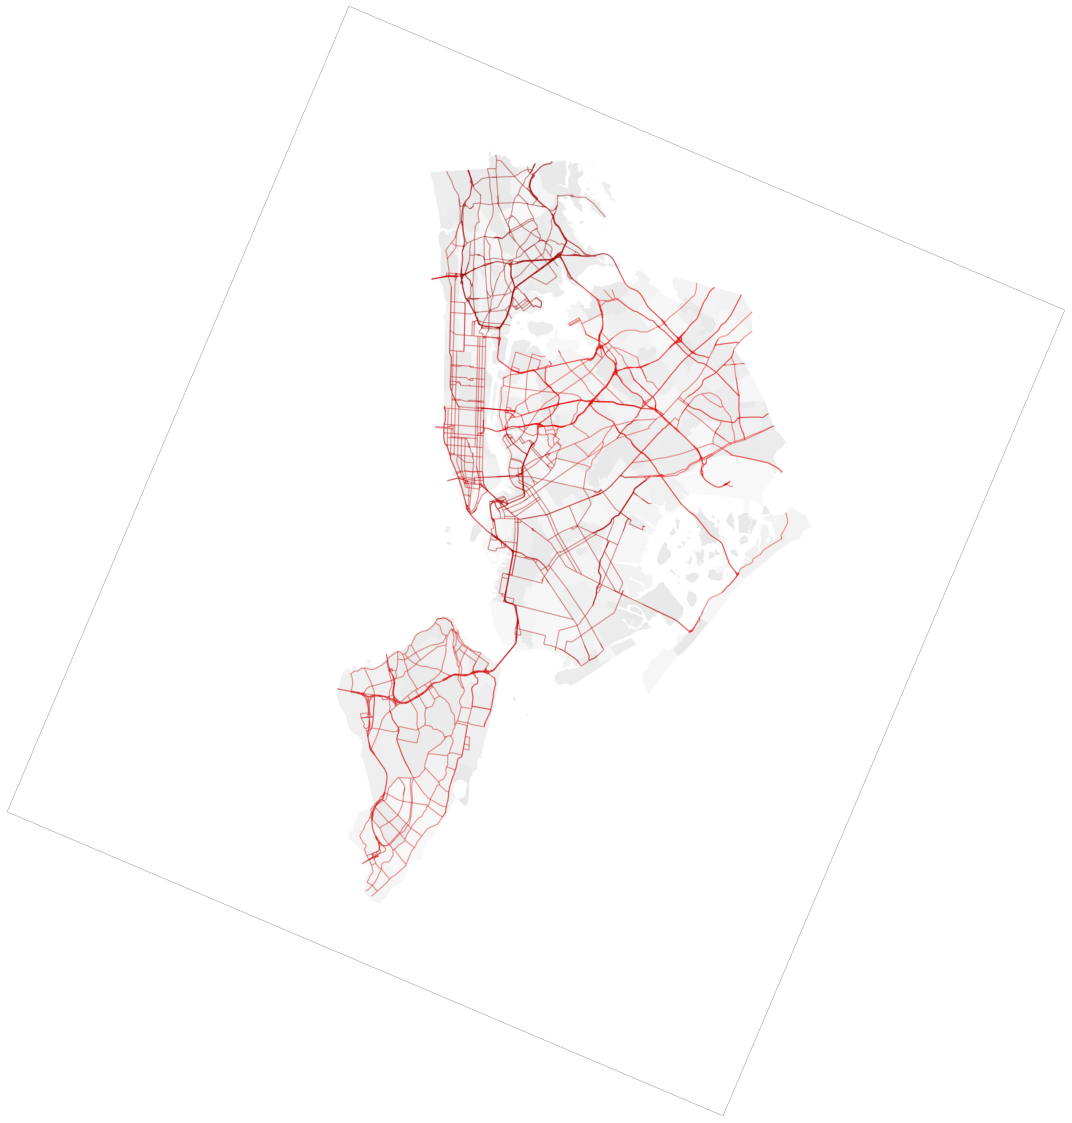

In [21]:
from scipy import ndimage
from matplotlib.patches import Rectangle


fig, ax = plt.subplots(figsize = (18,16)) 

fig.tight_layout()
# Define the CartoPy CRS object.
crs_ep_ar = ccrs.AlbersEqualArea()

crs_proj4 = crs_ep_ar.proj4_init

df_eq_ar_shp = shpNTA.to_crs(crs_proj4)
df_eq_ar_roads = roads.to_crs(crs_proj4)

df_eq_ar_shp.plot(ax=ax, cmap=grays, column='ntaname', legend=False, alpha=1,legend_kwds={"frameon": False, "loc":"upper left", "title_fontsize":20, "mode":None,"labelspacing":2,"borderpad":2, "prop":{"family":"Corbel", "size":14}});
df_eq_ar_roads.plot(ax=ax, column=variable, cmap=red_cmap, legend=False, alpha=0.45)
plt.ylabel("latitude", fontsize=12);
plt.xlabel("longitude", fontsize=12);
plt.axis('off')

# plt.set_facecolor("#cf2329")
plt.savefig('Truck_Routes_NYC_equal_area.png', dpi=200)
img = plt.imread('Truck_Routes_NYC_equal_area.png')
rotated_img = ndimage.rotate(img, 67)
plt.imshow(rotated_img)
plt.show()

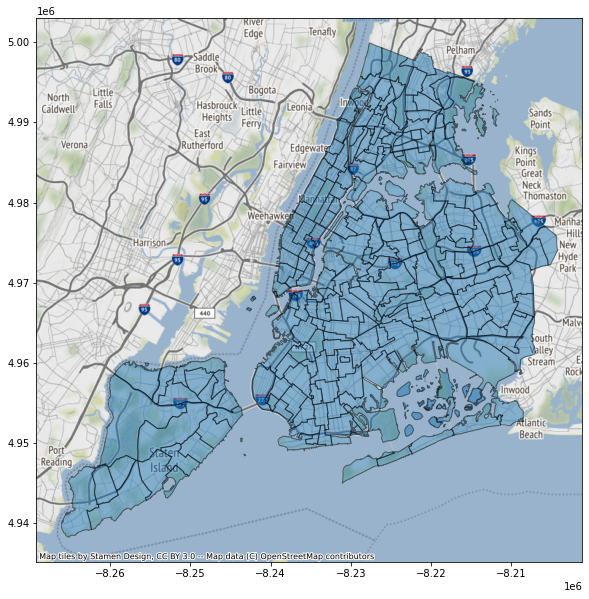

In [14]:
import contextily as ctx

dv = shpNTA.to_crs(epsg=3857)
ax = dv.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

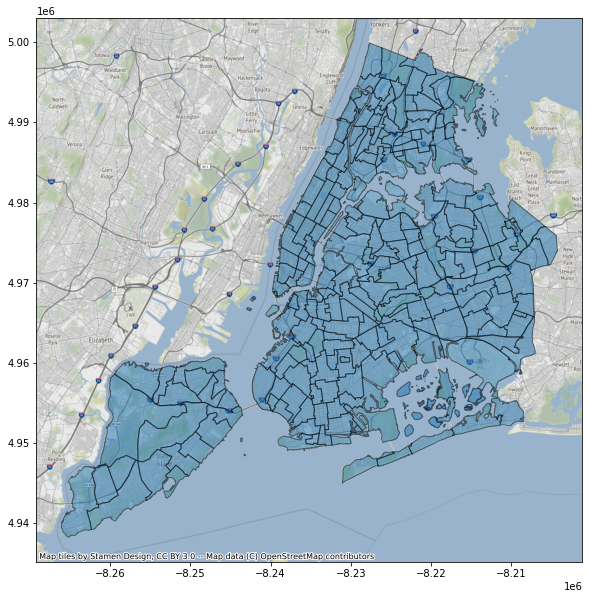

In [15]:
ax = dv.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, zoom=12)

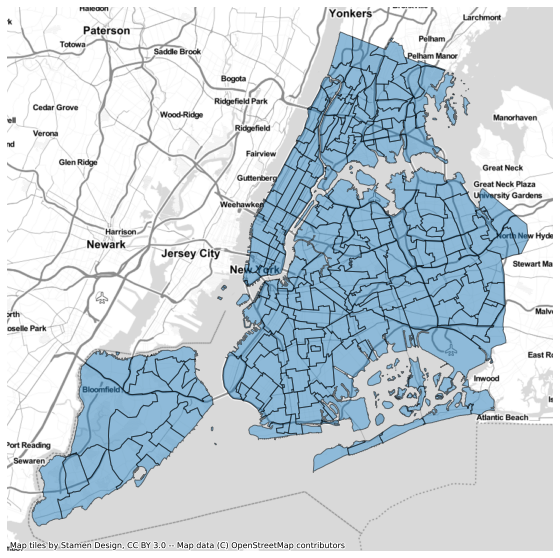

In [16]:
ax = dv.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()

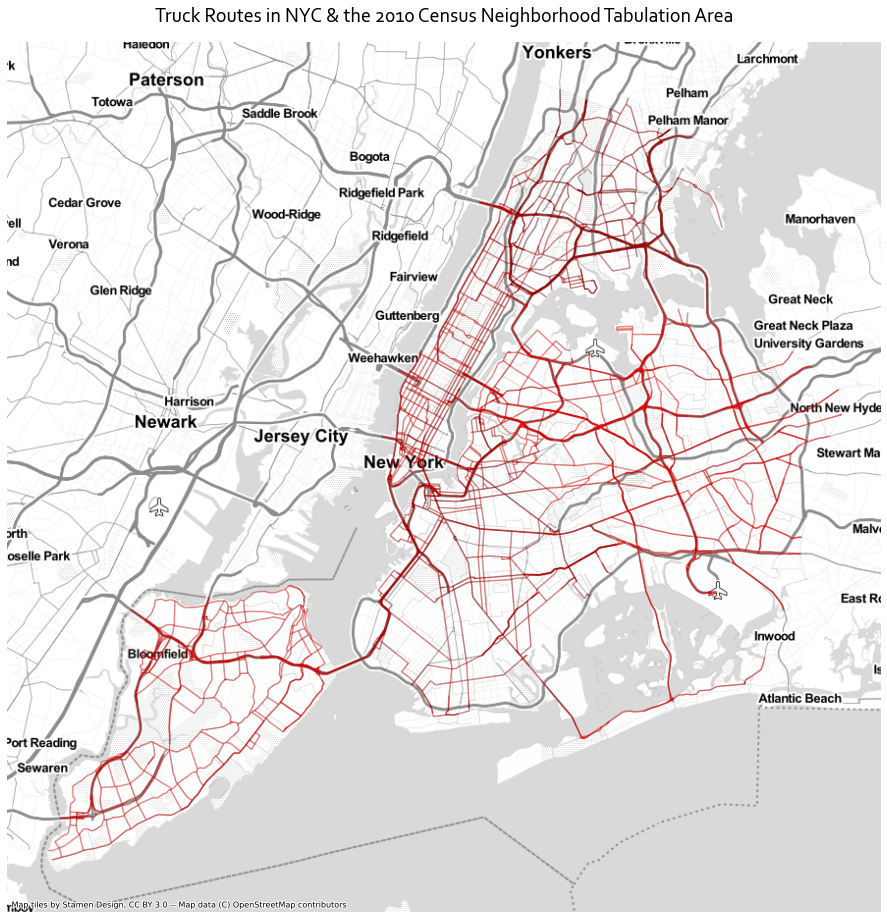

In [25]:
fig, ax = plt.subplots(figsize = (18,16)) 
dr = roads.to_crs(epsg=3857)
dv.plot(edgecolor='k', ax=ax, cmap=grays, column='ntaname', legend=False, alpha=0.05,legend_kwds={"frameon": False, "loc":"upper left", "title_fontsize":20, "mode":None,"labelspacing":2,"borderpad":2, "prop":{"family":"Corbel", "size":14}});
dr.plot(ax=ax, column=variable, cmap=red_cmap, legend=False, alpha=0.45)
plt.title("Truck Routes in NYC & the 2010 Census Neighborhood Tabulation Area", fontdict={"family":"Corbel"}, pad=20, fontname="Corbel", size=20);
plt.ylabel("latitude", fontsize=12);
plt.xlabel("longitude", fontsize=12);
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()
plt.savefig('Truck_Routes_NYC_with_BaseMap.png', dpi=200)
# fig.savefig('Truck_Routes_NYC.svg', format='svg', dpi=300)
# plt.savefig('Truck_Routes_NYC.eps', format='eps')
plt.show()

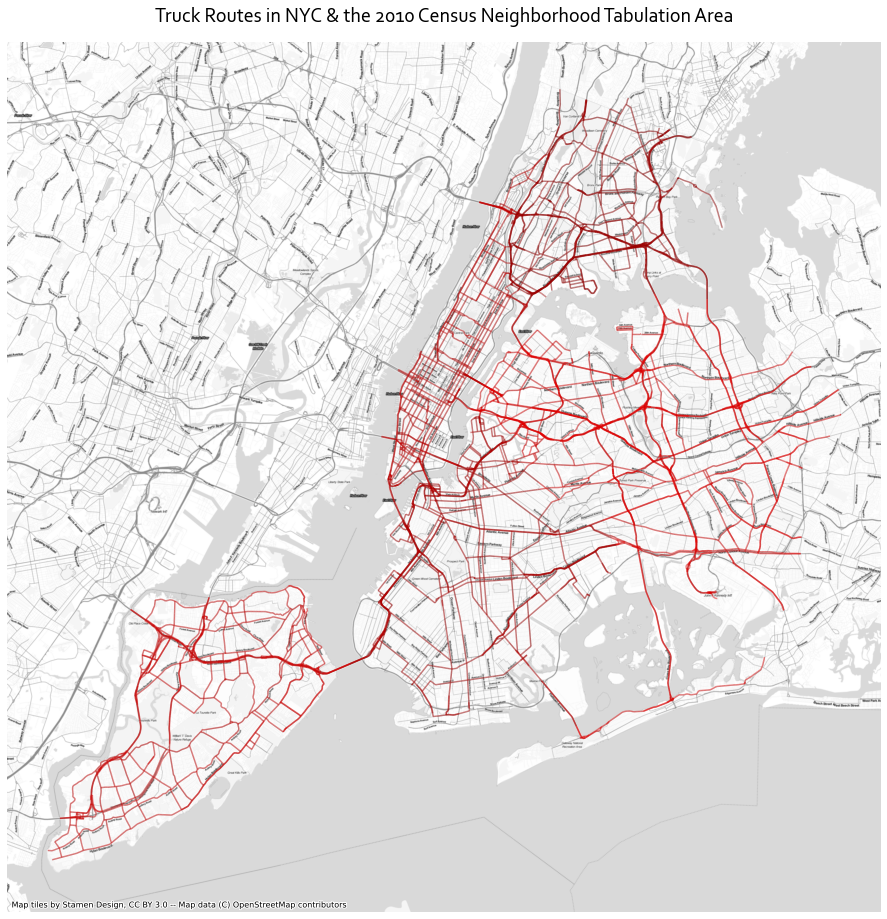

In [18]:
fig, ax = plt.subplots(figsize = (18,16)) 
dr = roads.to_crs(epsg=3857)
dv.plot(edgecolor='k', ax=ax, cmap=grays, column='ntaname', legend=False, alpha=0.05,legend_kwds={"frameon": False, "loc":"upper left", "title_fontsize":20, "mode":None,"labelspacing":2,"borderpad":2, "prop":{"family":"Corbel", "size":14}});
dr.plot(ax=ax, column=variable, cmap=red_cmap, legend=False, alpha=0.45)
plt.title("Truck Routes in NYC & the 2010 Census Neighborhood Tabulation Area", fontdict={"family":"Corbel"}, pad=20, fontname="Corbel", size=20);
plt.ylabel("latitude", fontsize=12);
plt.xlabel("longitude", fontsize=12);
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite, zoom=13)
ax.set_axis_off()

From cffi callback <function _verify_callback at 0x00000252C4C810D8>:
Traceback (most recent call last):
  File "C:\Users\lilyx\Anaconda3\lib\site-packages\OpenSSL\SSL.py", line 306, in wrapper
    @wraps(callback)
KeyboardInterrupt


SSLError: HTTPSConnectionPool(host='stamen-tiles-a.a.ssl.fastly.net', port=443): Max retries exceeded with url: /toner-lite/15/9675/12332.png (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))

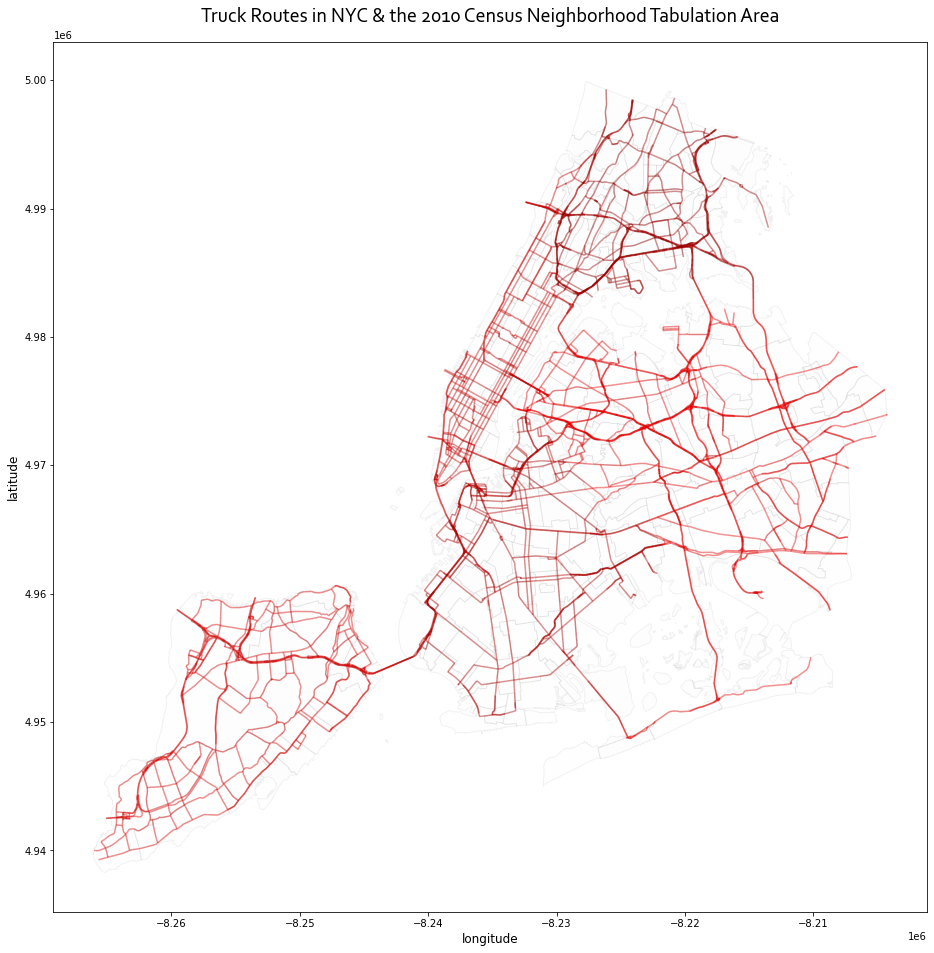

In [19]:
fig, ax = plt.subplots(figsize = (18,16)) 
dr = roads.to_crs(epsg=3857)
dv.plot(edgecolor='k', ax=ax, cmap=grays, column='ntaname', legend=False, alpha=0.05,legend_kwds={"frameon": False, "loc":"upper left", "title_fontsize":20, "mode":None,"labelspacing":2,"borderpad":2, "prop":{"family":"Corbel", "size":14}});
dr.plot(ax=ax, column=variable, cmap=red_cmap, legend=False, alpha=0.45)
plt.title("Truck Routes in NYC & the 2010 Census Neighborhood Tabulation Area", fontdict={"family":"Corbel"}, pad=20, fontname="Corbel", size=20);
plt.ylabel("latitude", fontsize=12);
plt.xlabel("longitude", fontsize=12);
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite, zoom=15)
ax.set_axis_off()